In [57]:
#imports
import pandas as pd
import seaborn as sns
import numpy as np

In [58]:
#load the csv for cleaning
house_value = pd.read_csv("../data/real_estate_value.csv", encoding= 'utf-8')

#take a look at the data
house_value.info()
house_value.head(2)

#copy the data and clean from the copy
cleaned_df = house_value.copy()

#the first column, No, is just an index number - drop it
cleaned_df = cleaned_df.drop(columns=['No'])

#rename to fill spaces with underscores
cleaned_df = cleaned_df.rename(columns= lambda x: x.replace(" ", "_"));

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   No                                   414 non-null    int64  
 1   transaction date                     414 non-null    float64
 2   house age                            414 non-null    float64
 3   distance to the nearest MRT station  414 non-null    float64
 4   number of convenience stores         414 non-null    int64  
 5   latitude                             414 non-null    float64
 6   longitude                            414 non-null    float64
 7   house price of unit area             414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


<AxesSubplot:xlabel='house_age'>

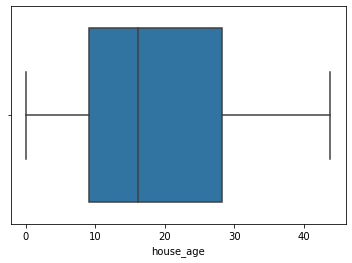

In [59]:
#use the following box and whisker plots to determine which features need to have outliers removed.
#Outliers in these visualizations are represented by the individual points outside the whisker lines of the plot.
sns.boxplot(x=cleaned_df['house_age']) # we see no outliers for house_age

<AxesSubplot:xlabel='distance_to_the_nearest_MRT_station'>

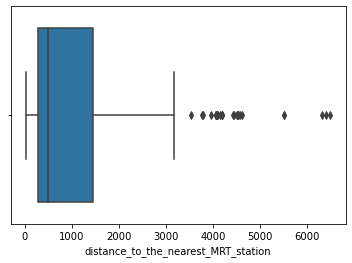

In [60]:
# we do see outliers for distance_to_the_nearest_MRT_station below
sns.boxplot(x=cleaned_df['distance_to_the_nearest_MRT_station'])

<AxesSubplot:xlabel='number_of_convenience_stores'>

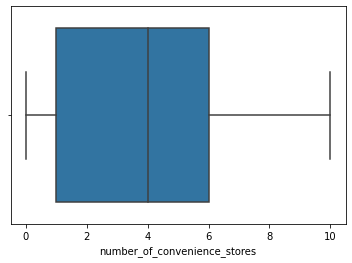

In [61]:
# we do not see any outliers for number_of_convenience_stores below
sns.boxplot(x=cleaned_df['number_of_convenience_stores'])

<AxesSubplot:xlabel='latitude'>

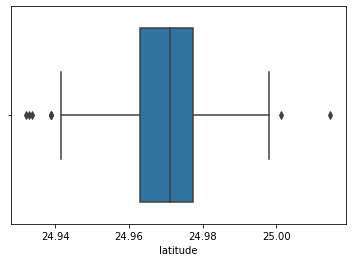

In [62]:
# we do see outliers for latitude below
sns.boxplot(x=cleaned_df['latitude'])

<AxesSubplot:xlabel='longitude'>

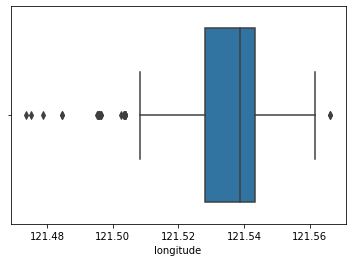

In [84]:
# we do see outliers for longitude below
sns.boxplot(x=cleaned_df['longitude'])

<AxesSubplot:xlabel='house_price_of_unit_area'>

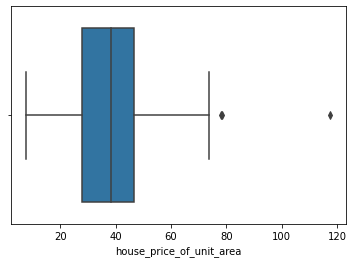

In [102]:
# we do see outliers for house_price_of_unit_area below
sns.boxplot(x=cleaned_df['house_price_of_unit_area'])

In [113]:
#function to remove outliers, given a dataframe and column, we calculate the IQR and remove outliers based on
#1.5 times the IQR, returning the new dataframe without the outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df[column] < (Q1 - 1.5 * IQR)) |(df[column] > (Q3 + 1.5 * IQR)))]

In [120]:
#so, based on the visualizations, we see that the latitude, longitude, distance_to_the_nearest_MRT_station
#and house_price_of_unit_area columns all contain outliers

#for simplicity and to enhance the performance of the model, lets remove these outliers

#first tried by using the normal distribution, but found that removing based on 1.5 * IQR was better since
#based on the above scatter plots, not all the distributions are normal, so using IQR is better suited

#starting with latitude:
cleaned_df_no_outliers = remove_outliers(cleaned_df, 'latitude')

#now for longitude:
cleaned_df_no_outliers = remove_outliers(cleaned_df_no_outliers, 'longitude')

#now for distance_to_the_nearest_MRT_station:
cleaned_df_no_outliers = remove_outliers(cleaned_df_no_outliers, 'distance_to_the_nearest_MRT_station')

#now for house_price_of_unit_area:
cleaned_df_no_outliers = remove_outliers(cleaned_df_no_outliers, 'house_price_of_unit_area')

In [121]:
#add a column for log of the house_price_of_unit_area for regression with it
cleaned_df_with_log = cleaned_df_no_outliers.copy()
cleaned_df_with_log['log_house_price_of_unit_area'] = np.log(cleaned_df_no_outliers['house_price_of_unit_area'])
cleaned_df_with_log.head(2)

,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area,log_house_price_of_unit_area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,3.634951
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,3.742420


In [122]:
#Now that we have cleaned the data, let's write it back to a csv so it may be loaded from any notebook
cleaned_df_with_log.to_csv('/Users/ZachV/Documents/UMBC/Grad/DATA602/HW1/DATA602-HW1/data/real_estate_value_cleaned.csv', index = False)